In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
simulation_dir = os.path.join(parent_dir, "optimize_rl")

sys.path.insert(0, simulation_dir)

0.00101701080667333 0.004011533639148334


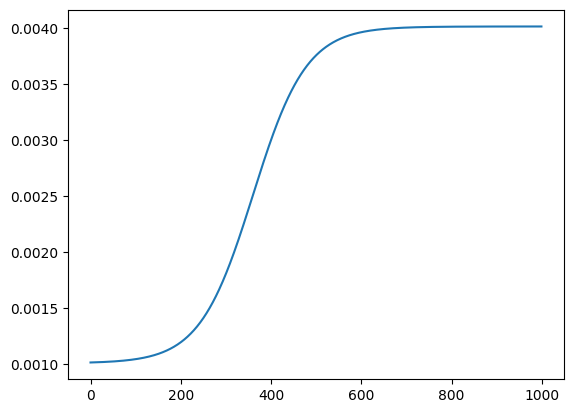

In [2]:
# Algebra's Dynamic Fee

from dynamic_fee import calculate_dynamic_beta

volatility_range = np.arange(0, 1000, 1)

beta = []
for volatility in volatility_range:
    beta.append(calculate_dynamic_beta(volatility))

print(min(beta), max(beta))

plt.plot(volatility_range, beta)

0.010284561638130357 0.3999950661896034


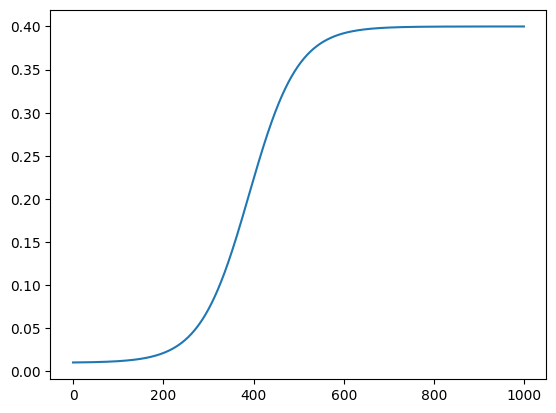

In [27]:
# Best Dynamic Beta Parameters

from dynamic_fee import custom_sigmoid

parameter = {'initial_min_fees': 0.01, 'alpha1': 0.39, 'alpha2': 0.012, 'beta1': 390, 'beta2': 60000, 'gamma1': 0.018518518518518517, 'gamma2': 0.001176470588235294, 'tvl_ratio': 1.0000833282888535}

volatility_range = np.arange(0, 1000, 1)

beta = []
for volatility in volatility_range:
    beta.append(parameter['initial_min_fees']+custom_sigmoid(volatility, parameter['alpha1'], parameter['gamma1'], parameter['beta1'])+custom_sigmoid(volatility, parameter['alpha2'], parameter['gamma2'], parameter['beta2']))

print(min(beta), max(beta))

plt.plot(volatility_range, beta)
 

In [ ]:
# Search for best parameters

# range_alpha1 = np.arange(0.03, 0.6, 0.03)
# range_alpha2 = [0.0012, 0.012, 0.12, 1.2]
# range_beta1 = np.arange(300, 420, 30)
# range_beta2 = [600, 6000, 60000, 600000, 6000000]
# range_gamma1 = [1 / 54, 1 / 59, 1 / 64]
# range_gamma2 = [1 / 85000, 1 / 8500, 1 / 850]


# # Make parameter set
# parameters = []
# for initial_min_fees in range_initial_min_fees:
#     for alpha1 in range_alpha1:
#         for alpha2 in range_alpha2:
#             for beta1 in range_beta1:
#                 for beta2 in range_beta2:
#                     for gamma1 in range_gamma1:
#                         for gamma2 in range_gamma2:
#                             parameters.append(
#                                 (
#                                     initial_min_fees,
#                                     alpha1,
#                                     alpha2,
#                                     beta1,
#                                     beta2,
#                                     gamma1,
#                                     gamma2,
#                                 )
#                             )

# # Plot all sigmoid functions with different parameters
# for parameter in parameters:
#     volatility_range = np.arange(0, 1000, 1)

#     beta = []
#     for volatility in volatility_range:
#         beta.append(
#             parameter[0]
#             + custom_sigmoid(volatility, parameter[1], parameter[5], parameter[3])
#             + custom_sigmoid(volatility, parameter[2], parameter[6], parameter[4])
#         )

#     if(max(beta) > 0.1 and 0.5>max(beta) and min(beta) < 0.1):
#         print(parameter)
#         plt.plot(volatility_range, beta)
#         plt.title(parameter)
#         plt.show()

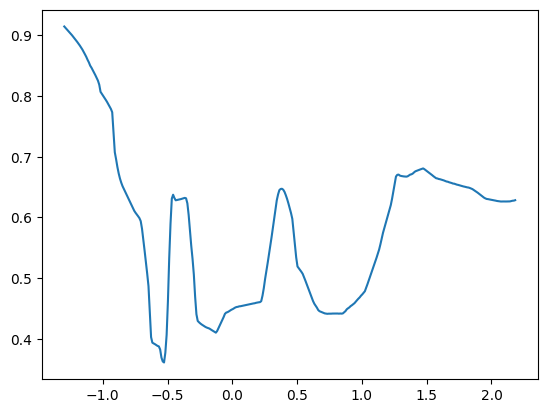

In [23]:
import torch
from PPO import ActorCritic

device = 'cpu'
ppo_agent = ActorCritic(1,1,1,0.0001).to(device)
ppo_agent.action_var= ppo_agent.action_var.to(device)
ppo_agent.load_state_dict(torch.load("../optimize_rl/PPO_preTrained/LVR/PPO_LVR_0_0_19.pth"))

volatility_range = np.arange(-372.31/287,(1000-372.31)/287,0.01)

beta = []
for volatility in volatility_range:
    state = torch.from_numpy(np.array([volatility]).astype(np.float32))
    state = state.to(device)  # move the state to the same device as the model
    action,_,_ = ppo_agent.act(state)
    # print(action)
    beta.append(action[0])  # move the action to the CPU and convert it to a NumPy array

plt.plot(volatility_range, beta)

In [2]:
import pandas as pd

result = pd.read_csv("results/result.csv")
result_new_liquidity = pd.read_csv("results/result_new_liquidity.csv")

num_pools = 3
pool_names = ['CFMM', 'Diamond', 'Dynamic Diamond']

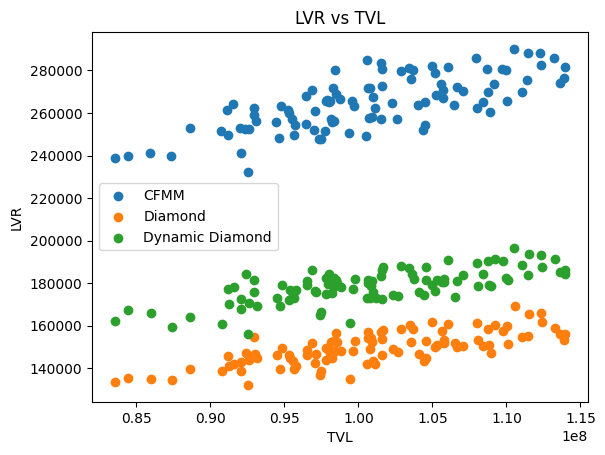

In [85]:
plt.figure()
plt.title('LVR vs TVL')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    lvr = result['LVR_'+str(pool)]
    plt.scatter(tvl, lvr, label=pool_names[i])

plt.legend()

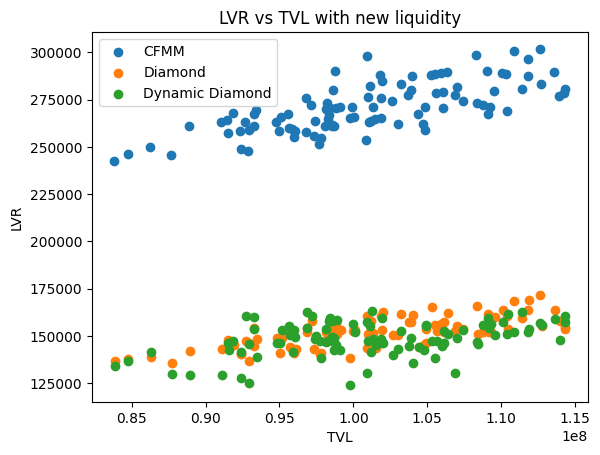

In [86]:
plt.figure()
plt.title('LVR vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    lvr = result_new_liquidity['LVR_'+str(pool)]
    plt.scatter(tvl, lvr, label=pool_names[i])

plt.legend()

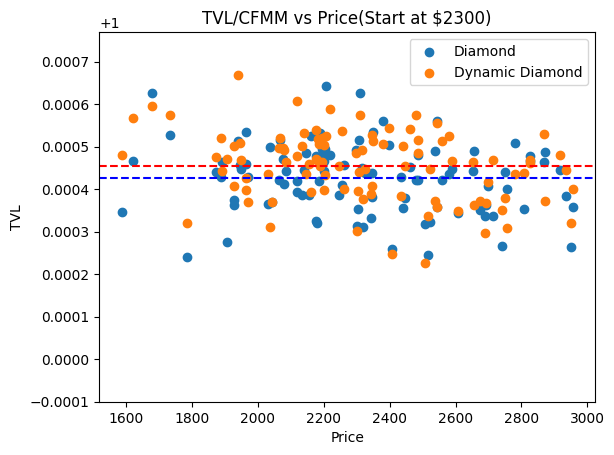

In [87]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300)')
plt.xlabel('Price')
plt.ylabel('TVL')

color = ['b' , 'r']
for i in range(1,num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)] / result['TVL_1']
    price = result['Price']
    plt.scatter(price, tvl, label=pool_names[i])
    plt.axhline(y=tvl.mean(), color=color[i-1], linestyle='--')

plt.ylim(bottom=0.9999, top = max(result['Best Pool TVL/CFMM'])*1.0001)

plt.legend()

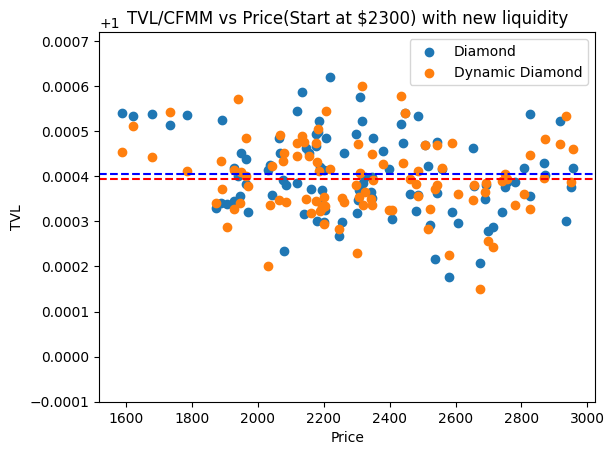

In [39]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300) with new liquidity')
plt.xlabel('Price')
plt.ylabel('TVL')

color = ['b' , 'r']
for i in range(1,num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)] / result_new_liquidity['TVL_1']
    price = result_new_liquidity['Price']
    plt.scatter(price, tvl, label=pool_names[i])
    plt.axhline(y=tvl.mean(), color=color[i-1], linestyle='--')

plt.ylim(bottom=0.9999, top = max(result_new_liquidity['Best Pool TVL/CFMM'])*1.0001)

plt.legend()

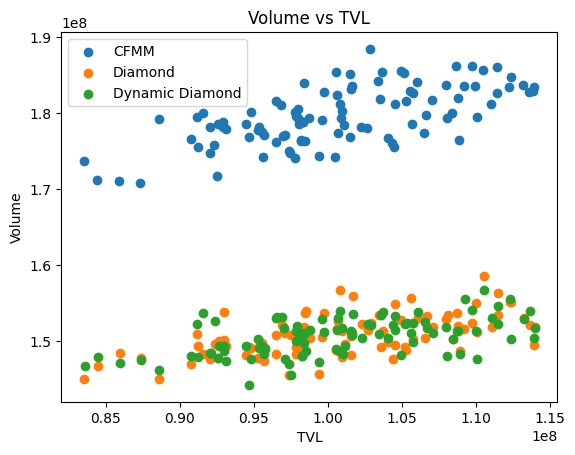

In [88]:
plt.figure()
plt.title('Volume vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

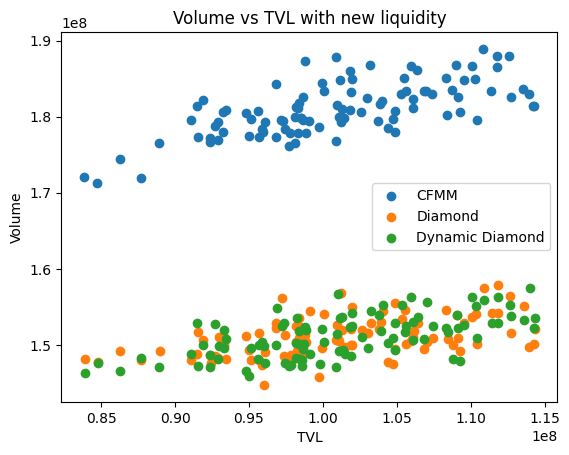

In [42]:
plt.figure()
plt.title('Volume vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

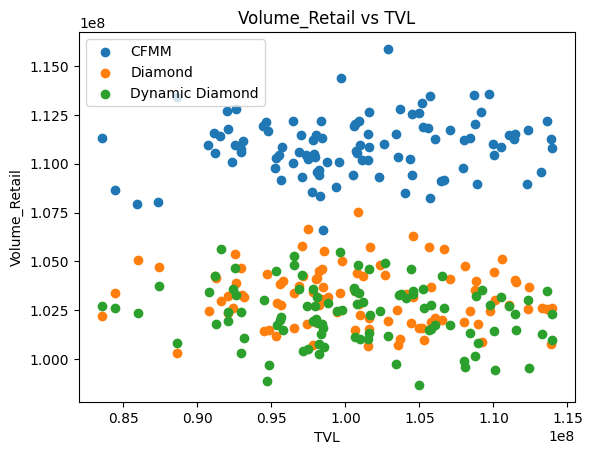

In [89]:
plt.figure()
plt.title('Volume_Retail vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

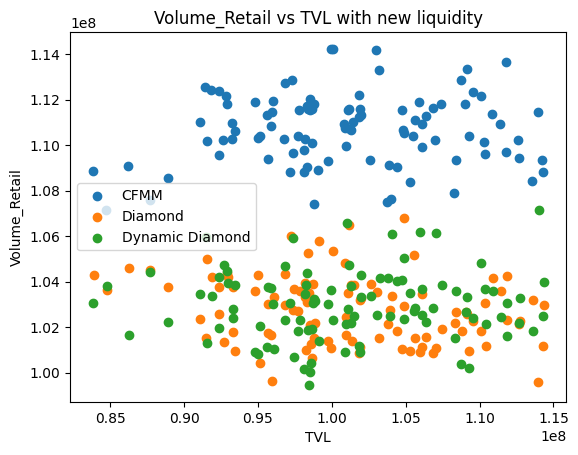

In [44]:
plt.figure()
plt.title('Volume_Retail vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

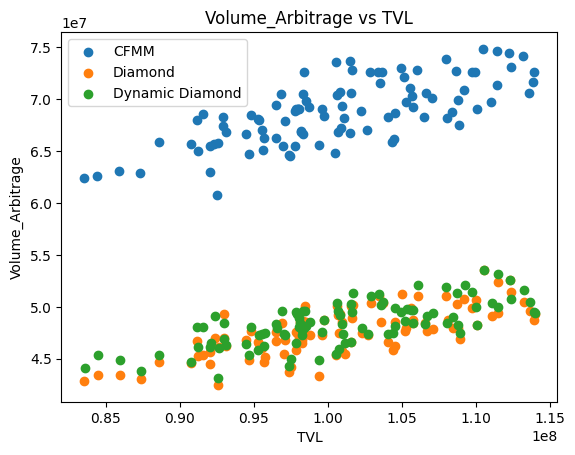

In [90]:
plt.figure()
plt.title('Volume_Arbitrage vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume_Arbitrage')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_Arbitrage_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

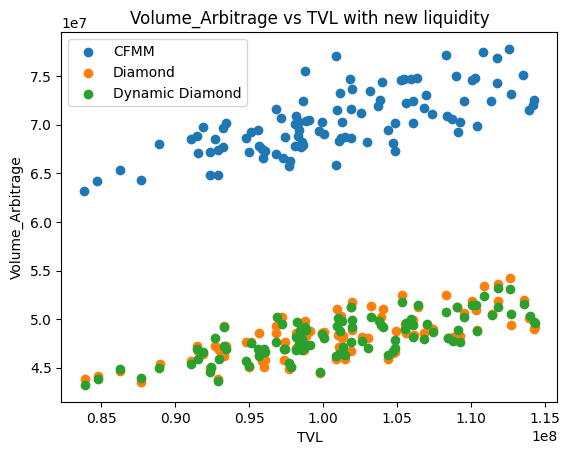

In [46]:
plt.figure()
plt.title('Volume_Arbitrage vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume_Arbitrage')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_Arbitrage_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

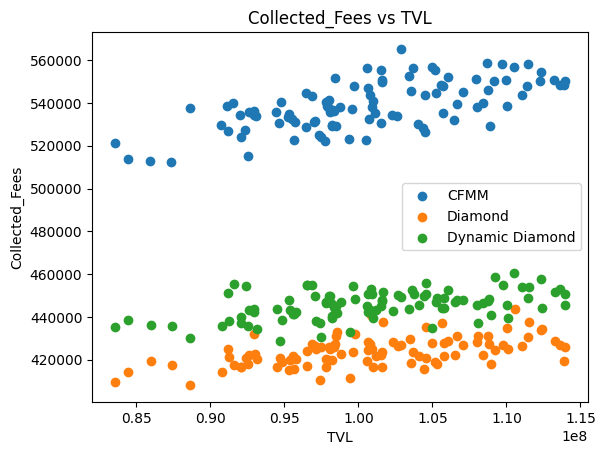

In [91]:
plt.figure()
plt.title('Collected_Fees vs TVL')
plt.xlabel('TVL')
plt.ylabel('Collected_Fees')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Collected_Fees_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

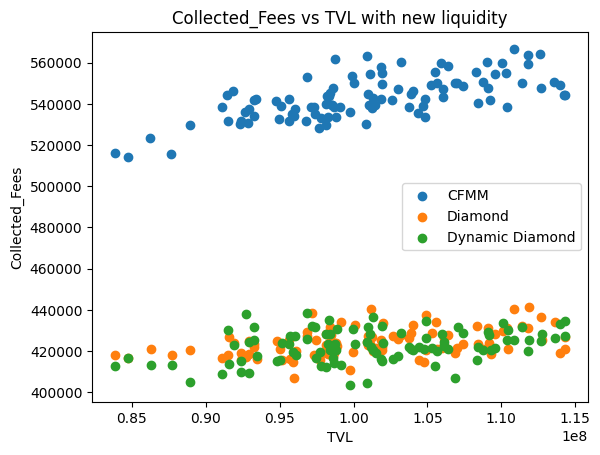

In [48]:
plt.figure()
plt.title('Collected_Fees vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Collected_Fees')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Collected_Fees_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

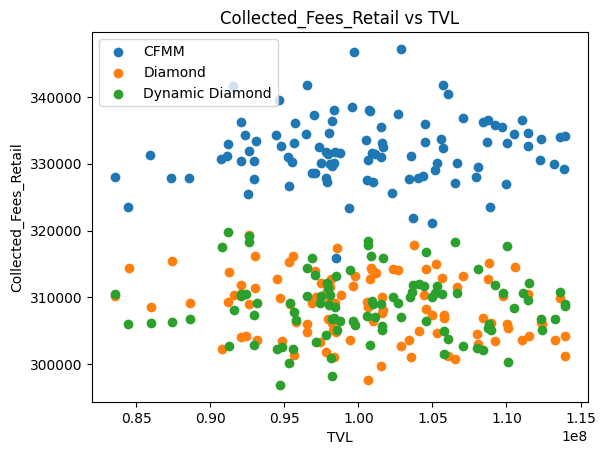

In [49]:
plt.figure()
plt.title('Collected_Fees_Retail vs TVL')
plt.xlabel('TVL')
plt.ylabel('Collected_Fees_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Collected_Fees_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

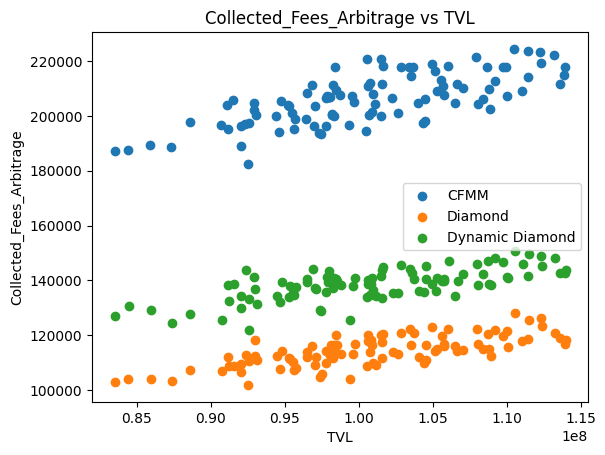

In [92]:
plt.figure()
plt.title('Collected_Fees_Arbitrage vs TVL')
plt.xlabel('TVL')
plt.ylabel('Collected_Fees_Arbitrage')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Collected_Fees_Arbitrage_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

In [29]:
from main import create_simulation

NUM_DAYS = 120

sim = create_simulation(num_days=NUM_DAYS,beta=0.75)

tvls = [
    []
    for _ in sim.liquidity_pools
]
lvrs = [
    []
    for _ in sim.liquidity_pools
]
volumes_retail = [
    []
    for _ in sim.liquidity_pools
]
volumes_arbitrage = [
    []
    for _ in sim.liquidity_pools
]
collected_fees_retail = [
    []
    for _ in sim.liquidity_pools
]
collected_fees_arbitrage = [
    []
    for _ in sim.liquidity_pools
]

prices = []
for block_num in range(sim.blocks_per_day * sim.num_days):
    sim.run_block(block_num)

    if (block_num + 1) % (sim.blocks_per_day/2) == 0:
        snapshot = sim.current_snapshot()
        prices.append(sim.oracle[block_num][sim.liquidity_pools[0].token_x]/sim.oracle[block_num][sim.liquidity_pools[0].token_y])
        for i, pool_snapshot in enumerate(snapshot):
            tvls[i].append(pool_snapshot['TVL'])      
            lvrs[i].append(pool_snapshot['LVR'])
            volumes_retail[i].append(pool_snapshot['Volume Retail'])
            volumes_arbitrage[i].append(pool_snapshot['Volume Arbitrage'])
            collected_fees_retail[i].append(pool_snapshot['Collected Fees Retail'])
            collected_fees_arbitrage[i].append(pool_snapshot['Collected Fees Arbitrage'])


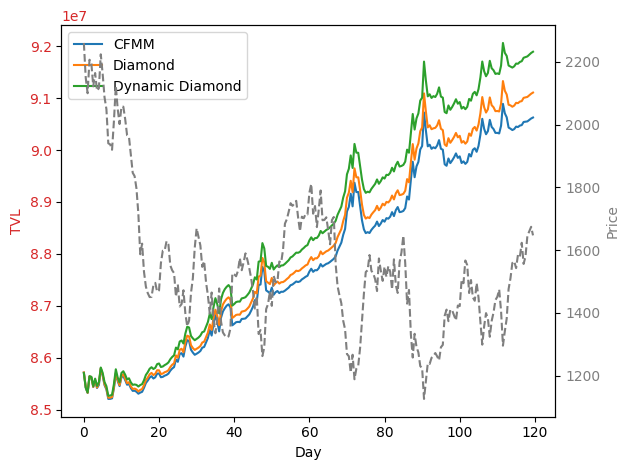

In [62]:

fig, ax1 = plt.subplots()

days = [i/2 for i in range(NUM_DAYS*2)]

color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('TVL', color=color)
pool_color = ['C0', 'C1', 'C2']

for i in range(len(tvls)):
    ax1.plot(days, tvls[i], color=pool_color[i], label=pool_names[i])
# Show the legend
ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:gray'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(days,prices, color=color, linestyle='--', label='Price')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [51]:
pip install imageio

   ---------------------------------------- 0.0/313.4 kB ? eta -:--:--
   --- ------------------------------------ 30.7/313.4 kB 1.3 MB/s eta 0:00:01
   --- ------------------------------------ 30.7/313.4 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------ 71.7/313.4 kB 435.7 kB/s eta 0:00:01
   ----------------------------------- ---- 276.5/313.4 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 276.5/313.4 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 276.5/313.4 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- 313.4/313.4 kB 924.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

# 예제 데이터 정의 (실제 데이터로 교체해야 함)
NUM_DAYS = 120

days = [i/2 for i in range(NUM_DAYS*2)]

# 이미지 파일을 저장할 리스트
filenames = []

if not os.path.exists("results/temp"):
    os.makedirs("results/temp")

for day_end in np.linspace(1, len(days), num=60):  # 점진적으로 그래프를 그리기 위한 단계
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Day')
    ax1.set_ylabel('TVL', color=color)
    pool_color = ['C0', 'C1', 'C2']

    for i in range(len(tvls)):
        ax1.plot(days[:int(day_end)], tvls[i][:int(day_end)], color=pool_color[i], label=pool_names[i])
    ax1.legend()
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:gray'
    ax2.set_ylabel('Price', color=color)
    ax2.plot(days[:int(day_end)], prices[:int(day_end)], color=color, linestyle='--', label='Price')
    ax2.tick_params(axis='y', labelcolor=color)

    ax1.set_xlim(0, NUM_DAYS)
    ax1.set_ylim(min([min(tvl) for tvl in tvls])*0.99, max([max(tvl) for tvl in tvls])*1.01)
    ax2.set_ylim(min(prices)*0.99, max(prices)*1.01)

    fig.tight_layout()

    # 이미지 파일 이름 생성
    filename = f'results/temp/plot_day{int(day_end)}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

# GIF 생성
with imageio.get_writer('results/120days_TVL.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# 생성된 이미지 파일 삭제 (선택 사항)
for filename in filenames:
    os.remove(filename)
os.removedirs("results/temp")

C:\Users\sangwon\AppData\Local\Temp\ipykernel_37848\119009458.py:49: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
